# Exploratory data analysis.

In this notebook we will perform eda to get a sense of how the data looks like. There will be some plotting to answer some questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"D:\Documentos\Vida_profesional\Coding\Projects\customer_churn_ml\data\raw\raw.csv")

In [3]:
data.head()
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print(data['MultipleLines'].unique())
print(data['PhoneService'].unique())
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())
print(data['DeviceProtection'].unique())
print(data['TechSupport'].unique())
print(data['StreamingTV'].unique())
print(data['StreamingMovies'].unique())
print(data['PaperlessBilling'].unique())

['No phone service' 'No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


It appears that the only numerical columns are tenure, MonthlyCharges and TotalCharges. The rest seems to be categorical data. 
\
Let's plot the churn distribution.



Churn
No     5174
Yes    1869
Name: count, dtype: int64


<BarContainer object of 2 artists>

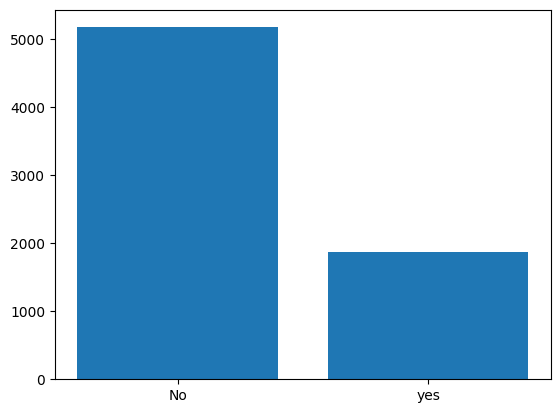

In [6]:
churn =data['Churn'].value_counts() 
print(churn)
plt.bar(['No','yes'],churn)

There are about 2.5 times more people that don't churn than people that churn.\

We want to measure correlation between categorical variables, the best way to test this is using the $\chi^2$ square test.\
To do this we will do a combination between the categorical variables and compute the $\chi$ square test on each of them.

In [7]:
from scipy.stats import chi2_contingency
from itertools import product

df_cat = pd.DataFrame(data=data.dtypes,columns=['a']).reset_index()
#print(df_cat)
CatVariables = list(df_cat['index'].loc[df_cat['a']=='object']) 
print(CatVariables)
df_cat = data[CatVariables]
df_cat = df_cat.dropna()

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


Now we want to to pair categories with one and other to see how correlated they are between them 

In [8]:
from itertools import combinations

cat_var_prod = list(combinations(CatVariables,2))


In [9]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],(chi2_contingency(pd.crosstab(
                                    df_cat[i[0]], df_cat[i[1]])))[1]))

In [10]:
PValues=[]
for i in result:
    if i[2]<0.01:
        PValues.append(i)

chi_test_output = pd.DataFrame(PValues, columns = ['var1','var2','coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
print('p-values from the chi2_contengency function')
print(chi_test_output.pivot(index='var1', columns='var2', values='coeff'))

p-values from the chi2_contengency function
var2                      Churn       Contract  Dependents  DeviceProtection  \
var1                                                                           
Contract          5.863038e-258            NaN         NaN               NaN   
Dependents         4.924922e-43   6.152878e-92         NaN      1.067414e-38   
DeviceProtection  5.505219e-122  1.067975e-267         NaN               NaN   
InternetService   9.571788e-160  3.289672e-129         NaN      0.000000e+00   
MultipleLines      3.464383e-03   7.795766e-19         NaN     1.032519e-183   
OnlineBackup      2.079759e-131  1.474616e-202         NaN      0.000000e+00   
OnlineSecurity    2.661150e-185  1.095261e-275         NaN      0.000000e+00   
PaperlessBilling   4.073355e-58            NaN         NaN               NaN   
Partner            2.139911e-36  9.271466e-135         0.0      3.695779e-43   
PaymentMethod     3.682355e-140            NaN         NaN               NaN

The only column we care about is churn but we have to see how correlated are some variables between themselves.
There seems to be some coliniarity between variables \

The fact that most variables are correlated with churn doesn't matter, correlation doesn't mean causation.

In [11]:
import joblib

bundle = joblib.load('D:\Documentos\Vida_profesional\Coding\Projects\customer_churn_ml\data\Saved_models\model_lr_2026-02-03.joblib')
model = bundle["model"]
FEATURES = bundle["features"]

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_test = pd.read_csv(r"D:\Documentos\Vida_profesional\Coding\Projects\customer_churn_ml\data\X_test\X_test_2026-02-04.csv")
y_test = pd.read_csv(r'D:\Documentos\Vida_profesional\Coding\Projects\customer_churn_ml\data\X_test\y_test_2026-02-04.csv')


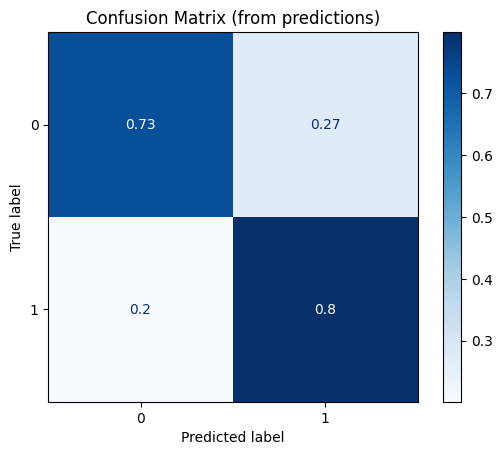

In [23]:
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    cmap=plt.cm.Blues,normalize='true'
)
plt.title("Confusion Matrix (from predictions)")
plt.show()

Twenty percent of people are being classified as not churners when they do actually churn.

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)
# Higher value = more important
importances = result.importances_mean
dic={X_test.columns[i]:importances[i] for i in range(len(X_test.columns))}
print(dic)

{'tenure': np.float64(0.09937428896473269), 'MonthlyCharges': np.float64(0.03919226393629129), 'TotalCharges': np.float64(0.032309442548350456), 'gender_Male': np.float64(0.0005688282138794576), 'SeniorCitizen_1': np.float64(0.0022753128555176748), 'Partner_Yes': np.float64(0.0014220705346985607), 'Dependents_Yes': np.float64(-5.688282138791578e-05), 'PhoneService_Yes': np.float64(-5.688282138793799e-05), 'MultipleLines_No phone service': np.float64(-5.688282138793799e-05), 'MultipleLines_Yes': np.float64(0.0015927189988623747), 'InternetService_Fiber optic': np.float64(0.04044368600682598), 'InternetService_No': np.float64(0.0004550625711035705), 'OnlineSecurity_No internet service': np.float64(0.0004550625711035705), 'OnlineSecurity_Yes': np.float64(-0.0038680318543799276), 'OnlineBackup_No internet service': np.float64(0.0004550625711035705), 'OnlineBackup_Yes': np.float64(0.0005688282138794354), 'DeviceProtection_No internet service': np.float64(0.0004550625711035705), 'DeviceProte

From the previous analysis dictionary we get that the most important feature from the model is tenure and MonthlyCharges. If we were to drop features these are the most important features that should stay. A next step would be to make another model with just these two features and see how it would perform.

AttributeError: 'Pipeline' object has no attribute 'coef_'